In [1]:
import gymnasium as gym
import neat
import random
import numpy as np
import matplotlib.pyplot as plt
from neat.parallel import ParallelEvaluator

In [2]:
config_path = 'neat.config'
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

In [4]:
env = gym.make("HalfCheetah-v4")

obs, info = env.reset()

In [9]:


def evaluate_genome(genome, config):
    net = neat.nn.FeedForwardNetwork.create(genome, config)

    fitness = 0.0
    genome.fitness = 0.0
    # Fitness is a 3D-vector
    for i in range(1):
        next_obs, info = env.reset()
        while True:
            output = net.activate(next_obs)
            action = np.array(np.clip(output,-1,1))
        
            next_obs, vector_reward, terminated, truncated, info = env.step(action)
            #reward = 10 * vector_reward[0] +10*vector_reward[1] + vector_reward[2]
            fitness += vector_reward

            if terminated or truncated:
                break
    genome.fitness = float(fitness)/1

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        evaluate_genome(genome, config)


 ****** Running generation 0 ****** 

Population's average fitness: -0.31256 stdev: 0.73316
Best fitness: 2.15439 - size: (6, 0) - species 1 - id 184
Average adjusted fitness: 0.423
Mean genetic distance 1.634, standard deviation 1.027
Population of 200 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   200      2.2    0.423     0
Total extinctions: 0
Generation time: 7.223 sec

 ****** Running generation 1 ****** 

Population's average fitness: -37.21972 stdev: 72.53822
Best fitness: 157.98613 - size: (6, 1) - species 1 - id 385
Average adjusted fitness: 0.769
Mean genetic distance 1.869, standard deviation 1.008
Population of 200 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   200    158.0    0.769     0
Total extinctions: 0
Generation time: 7.088 sec (7.155 average)

 ****** Running generation 2 ****** 

Population's average fitness: -33.70885

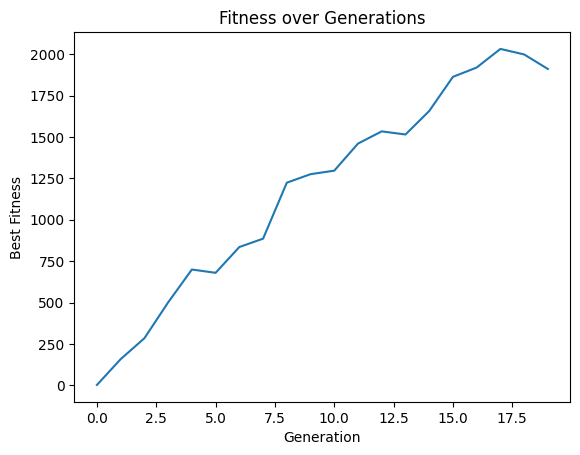

In [19]:
random.seed(42)

p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

def plot_fitness(stats):
    generation = range(len(stats.most_fit_genomes))
    best_fitness = [c.fitness for c in stats.most_fit_genomes]
    plt.plot(generation, best_fitness)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Fitness over Generations')
    plt.show()


# Run for up to 300 generations.
winner = p.run(eval_genomes, 10)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))
plot_fitness(stats)
    

In [16]:
eval_episodes = 100
eval_seed_offset = 1000
eval_rewards = []
for j in range(eval_episodes):
    net = neat.nn.RecurrentNetwork.create(winner, config)
    obs, info = env.reset(seed=(eval_seed_offset + j))
    rewards = np.zeros(3)
    done = False
    steps = 0
        
    while not done and steps <= 1000:
        output = net.activate(obs)
        action = np.array(np.clip(output,-1,1))
        next_obs, reward, terminated, truncated, info = env.step(action)
        rewards = np.add(rewards, reward)
        obs = next_obs
        done = terminated or truncated
        steps += 1

    eval_rewards.append(rewards)
        

print(eval_rewards)

[array([1537.53178267, 1537.53178267, 1537.53178267]), array([2127.03696186, 2127.03696186, 2127.03696186]), array([2117.33235293, 2117.33235293, 2117.33235293]), array([2079.63246995, 2079.63246995, 2079.63246995]), array([2055.31486543, 2055.31486543, 2055.31486543]), array([1968.84319855, 1968.84319855, 1968.84319855]), array([2110.72186763, 2110.72186763, 2110.72186763]), array([1692.25301169, 1692.25301169, 1692.25301169]), array([2083.54928714, 2083.54928714, 2083.54928714]), array([1512.10385494, 1512.10385494, 1512.10385494]), array([2100.04677472, 2100.04677472, 2100.04677472]), array([2121.10203132, 2121.10203132, 2121.10203132]), array([2045.99050765, 2045.99050765, 2045.99050765]), array([1935.24445572, 1935.24445572, 1935.24445572]), array([1918.60807115, 1918.60807115, 1918.60807115]), array([1920.25497286, 1920.25497286, 1920.25497286]), array([2035.85895583, 2035.85895583, 2035.85895583]), array([2114.03834138, 2114.03834138, 2114.03834138]), array([2126.57744068, 2126.

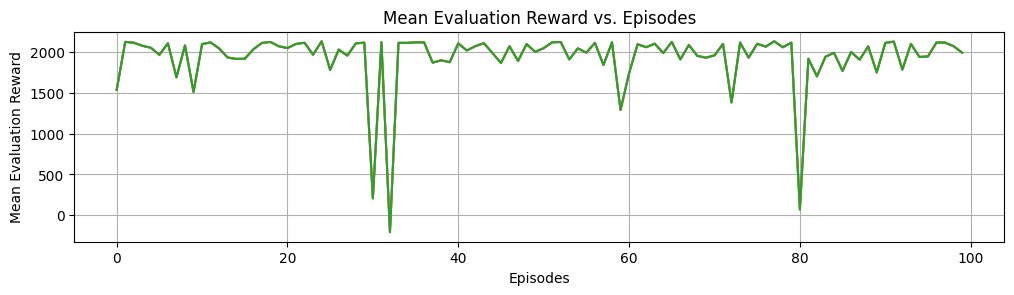

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot([i for i in range(100)], eval_rewards)
plt.xlabel('Episodes')
plt.ylabel('Mean Evaluation Reward')
plt.title('Mean Evaluation Reward vs. Episodes')
plt.grid(True)